In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

list_a, list_b, list_c = [], [], []
steps = 70
gradient = 0.02
for x in range(1, steps):
    y = round(gradient * x + math.sin(math.pi * 0.0725 * x), 6)
    s = steps * 0.8
    list_c.append(gradient * x)
    if x > s:
        list_a.append(np.nan)
        list_b.append(y)
    elif x == s:
        list_a.append(y)
        list_b.append(y)
    else:
        list_a.append(y)
        list_b.append(np.nan)

# print(list_a)
# print(list_b)

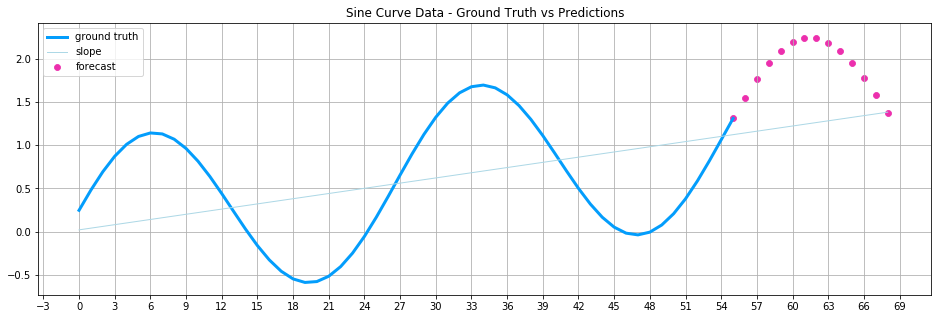

In [4]:
data = {"valid": list_a, "forecast": list_b, "gradient": list_c}
df = pd.DataFrame(data, columns=["valid", "forecast", "gradient"])

# df = df[df.index>200]
# Visualize the data
fig, ax1 = plt.subplots(figsize=(16, 5))
ax1.xaxis.set_major_locator(plt.MaxNLocator(30))
plt.title("Sine Curve Data - Ground Truth vs Predictions")
plt.plot(df[["valid"]], color="#039dfc", linewidth=3.0)
plt.plot(df[["gradient"]], color="lightblue", linewidth=1.0)
plt.scatter(
    df.index, df[["forecast"]], color="#EC2FAD", linewidth=0.8,
)
plt.legend(["ground truth", "slope", "forecast"], loc="upper left")
plt.grid()
plt.show()

In [ ]:
# Convert the dataframe to a numpy array
dfc = dfc.filter(["arrest_key"])
npdataset = dfc.values

# Get the number of rows to train the model on 80% of the data
training_data_length = math.ceil(len(npdataset) * 0.8)

# Transform features by scaling each feature to a range between 0 and 1
mmscaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = mmscaler.fit_transform(npdataset)

# Create a scaled training data set
train_data = scaled_data[0:training_data_length, :]


# Split the data into x_train and y_train data sets
x_train = []
y_train = []
trainingdatasize = len(train_data)

for i in range(100, trainingdatasize):
    x_train.append(train_data[i - 100 : i, 0])  # contains 100 values 0-100
    y_train.append(train_data[i, 0])  # contains all other values

# Convert the x_train and y_train to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)
print(y_train.shape)
# Configure the neural network model
model = Sequential()

# Model with 100 Neurons
# inputshape = 100 Timestamps
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(50, activation="relu"))
model.add(Dense(1))

# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

# Create the test data set
# Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_length - 100 :, :]

# Create the data sets x_test and y_test
x_test = []
y_test = npdataset[training_data_length:, :]
for i in range(100, len(test_data)):
    x_test.append(test_data[i - 100 : i, 0])